# Classification of fashion items based on images

In [0]:
import matplotlib.pyplot as plt
import random
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten
from sklearn.metrics import classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Analyzing the dataset

In [134]:
print("Length of training set = ", len(x_train))
print("Length of test set = ", len(x_test))

Length of training set =  60000
Length of test set =  10000


**The dataset consists of images with their labels indicating the type of fashion item**<br>
>
>These are the following labels alongwith their description : <br>
>
>**Label	Description**<br>
>0	T-shirt/top<br>
>1	Trouser<br>
>2	Pullover<br>
>3	Dress<br>
>4	Coat<br>
>5	Sandal<br>
>6	Shirt<br>
>7	Sneaker<br>
>8	Bag<br>
>9	Ankle boot<br>

**Now, let's have a look at one of the images to get a better idea of our dataset**

Label =  2


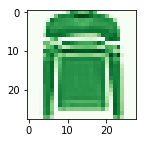

In [135]:
f, ax = plt.subplots(1, figsize=(2,2))
ax.imshow(x_train[5], cmap="Greens")
print("Label = ", y_train[5])

## Preparing the data

*The above was an image of Ankle Boot and thus labled as 9*

In [0]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 5

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
x_train /= 255
x_test /= 255

In [0]:
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [142]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.4579 - acc: 0.8379 - val_loss: 0.3725 - val_acc: 0.8701
Epoch 2/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.3111 - acc: 0.8901 - val_loss: 0.3195 - val_acc: 0.8843
Epoch 3/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.2677 - acc: 0.9027 - val_loss: 0.3073 - val_acc: 0.8904
Epoch 4/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.2347 - acc: 0.9165 - val_loss: 0.2747 - val_acc: 0.9019
Epoch 5/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.2075 - acc: 0.9250 - val_loss: 0.2647 - val_acc: 0.9057


## Analyzing our results

In [0]:
res = model.predict(x_test)
predictions = []
actual = []
for i, j in zip(res, y_test):
  predictions.append(i.argmax())
  actual.append(j.argmax())

In [145]:
print(classification_report(predictions, actual))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       972
           1       0.99      0.98      0.98      1008
           2       0.85      0.84      0.85      1013
           3       0.93      0.88      0.90      1056
           4       0.79      0.89      0.84       885
           5       0.99      0.96      0.97      1033
           6       0.76      0.73      0.75      1043
           7       0.95      0.97      0.96       978
           8       0.98      0.97      0.98      1016
           9       0.96      0.97      0.97       996

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**As we can clearly see, the results are improved compared to our previous model in which we used ANN instead of CNN**<br>
*The file is in the same directory named FashionMnistANN*